<a href="https://colab.research.google.com/github/txusser/Master_IA_Sanidad/blob/main/Modulo_2/2_3_4_Regresion_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión logística

## Framingham Heart Study-Cohort (FHS-Cohort)
En este proyecto emplearemos el [dataset Framingham](https://biolincc.nhlbi.nih.gov/studies/framcohort/) cuyo objetivo es el estudio de la incidencia y prevalencia de las enfermedades coronarias.
Puedes descargar el fichero CSV [pinchando aquí](https://https://drive.google.com/file/d/1YNP9ObQBcLYSS-W2OeCaraPqvETiOoCS/view?usp=sharing).
A continuación tienes una descripción de las variables incluidas en este conjunto de datos.

:
**Demographic**
* **Sex**: male or female(Nominal)
* **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
* **Current Smoker**: whether or not the patient is a current smoker (Nominal)
* **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**
* **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)
* **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)
* **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)
* **Diabetes**: whether or not the patient had diabetes (Nominal)

**Medical(current)**
* **Tot Chol**: total cholesterol level (Continuous)
* **Sys BP**: systolic blood pressure (Continuous)
* **Dia BP**: diastolic blood pressure (Continuous)
* **BMI**: Body Mass Index (Continuous)
* **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* **Glucose**: glucose level (Continuous)

**Predict variable (desired target)**
* 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

   male  age  education  currentSmoker  ...    BMI  heartRate  glucose  TenYearCHD
0     1   39        4.0              0  ...  26.97       80.0     77.0           0
1     0   46        2.0              0  ...  28.73       95.0     76.0           0
2     1   48        1.0              1  ...  25.34       75.0     70.0           0
3     0   61        3.0              1  ...  28.58       65.0    103.0           1
4     0   46        3.0              1  ...  23.10       85.0     85.0           0

[5 rows x 16 columns]
              male          age  ...      glucose   TenYearCHD
count  4238.000000  4238.000000  ...  3850.000000  4238.000000
mean      0.429212    49.584946  ...    81.966753     0.151958
std       0.495022     8.572160  ...    23.959998     0.359023
min       0.000000    32.000000  ...    40.000000     0.000000
25%       0.000000    42.000000  ...    71.000000     0.000000
50%       0.000000    49.000000  ...    78.000000     0.000000
75%       1.000000    56.000000  ...  

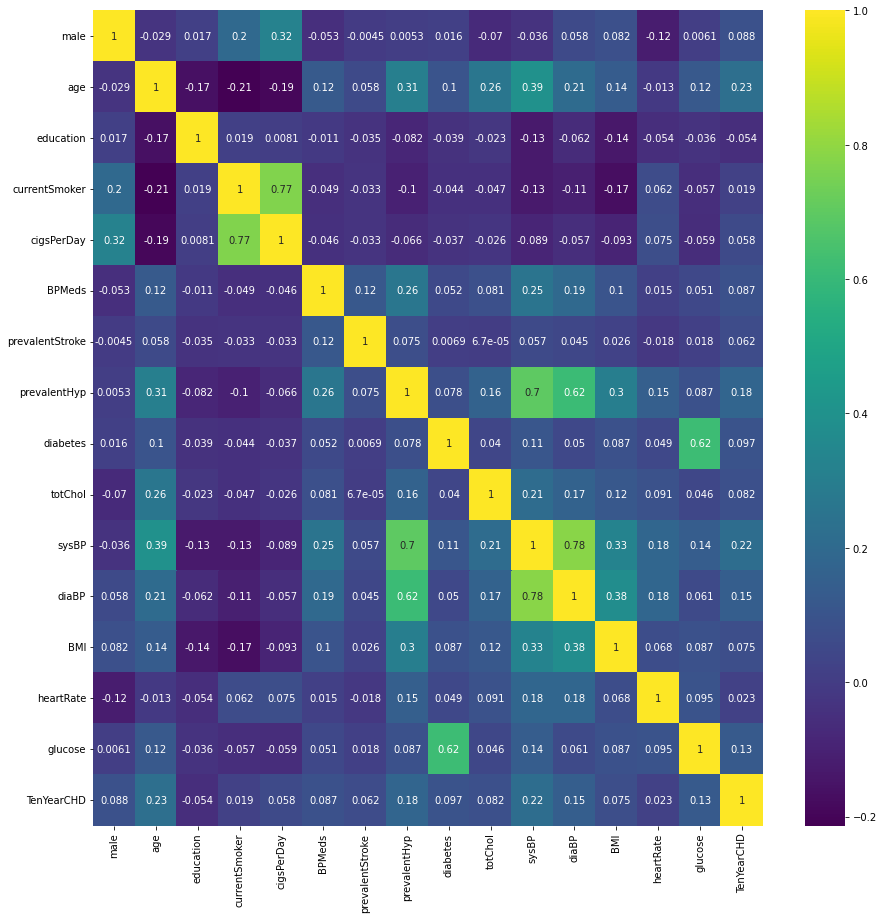

In [ ]:
# Librerías de trabajo básicas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Cargamos los datos
df = pd.read_csv("heart_disease.csv")
print(df.head())
print(df.describe())

# Visualizamos el mapa de correlación de las variables
fig = plt.figure(1, figsize=(15, 15))
sns.heatmap(df.corr(),annot=True, cmap='viridis')
plt.show()

In [ ]:
# Valores perdidos y NaNs en el dataset
print(df.isna().sum())
# Eliminamos estos datos
df = df.dropna()
print("\n => NaNs\n", df.isna().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

 => NaNs
 male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


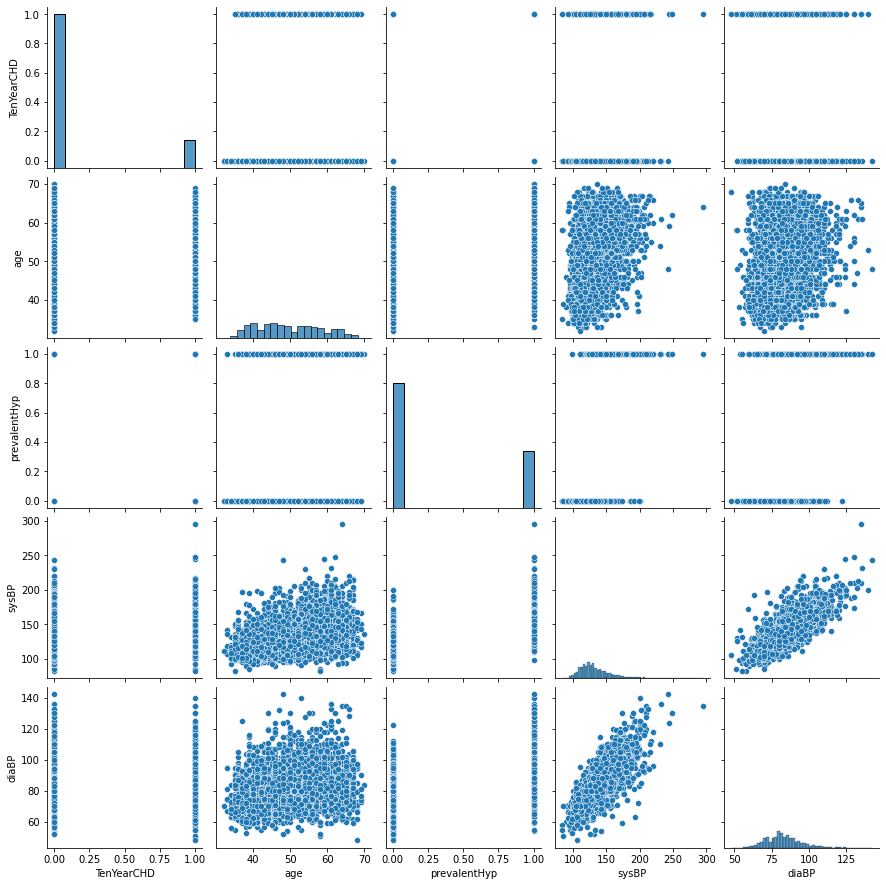

In [ ]:
df_l = df[['TenYearCHD', 'age', 'prevalentHyp', 'sysBP', 'diaBP']]
sns.pairplot(df_l)

In [ ]:
# Importar las librerías necesarias
from statsmodels.tools import add_constant  # Para agregar una columna de unos (constante) al conjunto de datos
import statsmodels.api as sm  # Para construir el modelo de regresión logística
from scipy import stats  # Para realizar cálculos estadísticos

# Añadir una constante al DataFrame
df_constant = add_constant(df)
df_constant.head()  # Mostrar las primeras filas del DataFrame con la constante añadida

# Configurar la función de probabilidad chi-cuadrado para el valor p
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

# Construir el modelo de regresión logística
# df.TenYearCHD es la variable dependiente (columna TenYearCHD del DataFrame df)
# df_constant[df.columns] selecciona todas las columnas del DataFrame df_constant
model = sm.Logit(df.TenYearCHD, df_constant[df.columns])

# Ajustar el modelo a los datos
result = model.fit()

# Mostrar un resumen de los resultados del modelo
result.summary()


Optimization terminated successfully.
         Current function value: 0.376668
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3656
Model:                          Logit   Df Residuals:                     3640
Method:                           MLE   Df Model:                           15
Date:                Thu, 30 Dec 2021   Pseudo R-squ.:                  0.1174
Time:                        15:10:17   Log-Likelihood:                -1377.1
converged:                       True   LL-Null:                       -1560.3
Covariance Type:            nonrobust   LLR p-value:                 8.027e-69
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.3222      0.715    -11.632      0.000      -9.725      -6.920
male                0.5551      0.109      5.090      0.000       0.341       0.769
age                 0.0635      0.007      9.499      0.000       0.050       0.077
education          -0.0475      0.049     -0.962      0.336      -0.144       0.049
currentSmoker       0.0709      0.157      0.452      0.651      -0.236       0.378
cigsPerDay          0.0179      0.006      2.874      0.004       0.006       0.030
BPMeds              0.1623      0.234      0.692      0.489      -0.297       0.621
prevalentStroke     0.6935      0.490      1.417      0.157      -0.266       1.653
prevalentHyp        0.2346      0.138      1.700      0.089      -0.036       0.505
diabetes            0.0395      0.315      0.125      0.900      -0.579       0.658
totChol             0.0023      0.001      2.062      0.039       0.000       0.005
sysBP               0.0154      0.004      4.043      0.000       0.008       0.023
diaBP              -0.0041      0.006     -0.642      0.521      -0.017       0.008
BMI                 0.0066      0.013      0.518      0.605      -0.018       0.032
heartRate          -0.0032      0.004     -0.772      0.440      -0.012       0.005
glucose             0.0071      0.002      3.189      0.001       0.003       0.012
===================================================================================
"""

Los resultados anteriores muestran un valor P superior al recomendado (5%) para algunas características. Esto implica que tienen una baja relación estadística con la probabilidad de enfermedad cardíaca.

A continuación, utilizaremos la técnica de eliminación retrospectiva para deshacernos de aquellas variables que aportan menor información. En [este enlace](https://medium.com/@abhinav.mahapatra10/ml-basics-feature-selection-part-2-3b9b3e71c14a) encontrarás más información acerca de esta técnica de selección de características.

La técnica de eliminación retrospectiva consiste en eliminar una por una las variables menos significativas, seguido de la ejecución de la regresión repetidamente hasta que todos los atributos tengan valores P inferiores a 0,05.

Otras referencia:
* [Regresión lineal múltiple (técnica de eliminación hacia atrás)](https://barcelonageeks.com/ml-regresion-lineal-multiple-tecnica-de-eliminacion-hacia-atras/)
*

In [ ]:
def back_feature_elem(df, dep_var, cols):
    """
    Takes in the dataframe, the dependent variable and a list of column names,
    runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary
    with all p-values below alpha
    """
    for col in cols:
      model = sm.Logit(dep_var, df[cols])
      result = model.fit(disp=0)
      largest_pvalue = round(result.pvalues,3).nlargest(1)
      if largest_pvalue[0]<(0.05):
        return result
      else:
        cols = cols.drop(largest_pvalue.index)

result = back_feature_elem(df_constant, df.TenYearCHD, cols)
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3656
Model:                          Logit   Df Residuals:                     3649
Method:                           MLE   Df Model:                            6
Date:                Thu, 30 Dec 2021   Pseudo R-squ.:                  0.1147
Time:                        15:10:22   Log-Likelihood:                -1381.2
converged:                       True   LL-Null:                       -1560.3
Covariance Type:            nonrobust   LLR p-value:                 2.885e-74
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1298      0.476    -19.199      0.000     -10.062      -8.198
male           0.5614      0.107      5.255      0.000       0.352       0.771
age            0.0659      0.006     10.254      0.000       0.053       0.078
cigsPerDay     0.0192      0.004      4.604      0.000       0.011       0.027
totChol        0.0023      0.001      2.024      0.043    7.16e-05       0.004
sysBP          0.0175      0.002      8.159      0.000       0.013       0.022
glucose        0.0073      0.002      4.342      0.000       0.004       0.011
==============================================================================
"""

In [ ]:
# Seleccionamos las características con las que entrenar nuestro modelo a
# partir de los resultados anteriores
s_feats = df_s[['age','male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
X = s_feats.iloc[:,:-1]
y= s_feats.iloc[:,-1]

import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=5)
print("X train shape:", X_train.shape)
print("y train shape:", y_train.shape)
print("y_train diez primeros valores:", y_train[:10])

X train shape: (2924, 6)
y train shape: (2924,)
y_train diez primeros valores: 3497    0
2572    0
2715    0
3511    0
243     0
1549    0
2000    0
4083    0
844     1
2148    0
Name: TenYearCHD, dtype: int64


### Entrenamos y evaluamos el modelo resultante

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Evaluamos la precisión del modelo
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
print(50 * "*")
print("\n => Precisión del modelo: => {:.2f}".format(acc))

**************************************************

 => Precisión del modelo: => 0.86


## SVC

El método de clasificación de vectores de apoyo puede ampliarse para resolver problemas de regresión. Este método se denomina Regresión de Vectores de Soporte.

El modelo producido por la clasificación de vectores de soporte (como se ha descrito anteriormente) sólo depende de un subconjunto de los datos de entrenamiento, porque la función de coste para construir el modelo no se preocupa de los puntos de entrenamiento que se encuentran más allá del margen. De forma análoga, el modelo producido por la regresión de vectores de soporte depende sólo de un subconjunto de los datos de entrenamiento, porque la función de coste ignora las muestras cuya predicción está cerca de su objetivo.

Hay tres implementaciones diferentes de la regresión de vectores de apoyo: SVR, NuSVR y LinearSVR. LinearSVR proporciona una implementación más rápida que SVR pero sólo considera el kernel lineal, mientras que NuSVR implementa una formulación ligeramente diferente a la de SVR y LinearSVR. Consulte los detalles de la implementación para obtener más información.

In [ ]:
# TODO Use for Breast Cancer
from sklearn.svm import SVC, SVR
from sklearn.metrics import confusion_matrix

svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_lin.fit(X_train, y_train)
y_pred = svr_lin.predict(X_test)
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
print("ACC:", acc)

from sklearn import svm
regr = svm.SVR()
# svc = SVC()
regr.fit(X_train, y_train)
prediction = regr.predict(X_test)
# cm = confusion_matrix(y_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]

accuracy = sum/X_test.shape[0]
print(accuracy)

ValueError: ignored